In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sasmodels.core import load_model
from sasmodels.direct_model import call_kernel 

pyplot_style ={"text.usetex": True,
               "text.latex.preamble": r"\usepackage{amsfonts}\usepackage[version=4]{mhchem}",
               "axes.spines.right" : False,
               "axes.spines.top" : False,
               "font.size": 22,
               "savefig.dpi": 600,
               "savefig.bbox": 'tight',
               
              } 

In [12]:
# create data to replicate results from pedersen paper
def get_contrasts(d):
    rho_solv = 1

    if d==1:
        # Homogenous
        rho_s = rho_solv+1
        rho_c = rho_solv+1
    if d==2:
        # Shell
        rho_s = rho_solv
        rho_c = rho_solv+1
    if d==3:
        # core
        rho_s = rho_solv+1
        rho_c = rho_solv

    return rho_solv, rho_s, rho_c 

# Example (units in Å)
Vc = 4000
Vs = 4000
R = 40
N = 67
Rg = 10
d = 1.0
rho_solv, rho_s, rho_c = get_contrasts(2)
V_total = N*(Vs+Vc) 

# Spherical micelle in sasmodels

[homogenous] :  1 2 2
[shell] :  1 1 2
[core] :  1 2 1


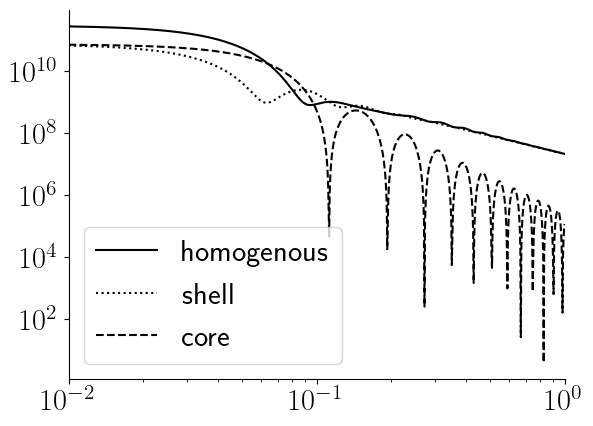

CPU times: user 436 ms, sys: 60 ms, total: 496 ms
Wall time: 191 ms


In [18]:
%%time
model = load_model("./models/spherical_micelle.py")
q = np.logspace(-2, 0, 1000)
kernel = model.make_kernel([q])
with plt.style.context(pyplot_style):
    fig, ax = plt.subplots()
    labels =['homogenous', 'shell', 'core']
    linestyles = ['solid','dotted','dashed' ]
    for i in range(3):
        rho_solv, rho_s, rho_c = get_contrasts(i+1)
        print('[%s] : '%labels[i], rho_solv, rho_s, rho_c)
        sphere_params = {'v_core' : Vc,    
                'v_corona' : Vs,
                'sld_solvent' : rho_solv,
                'sld_core' : rho_s,
                'sld_corona' : rho_c,
                'radius_core': R,
                'rg': Rg,
                'd_penetration':d,
                'n_aggreg' : N,
                }
        Iq = call_kernel(kernel, sphere_params)
        ax.loglog(q, Iq, label=labels[i], ls=linestyles[i], color='k')
        # ax.set_ylim([1e0, 1e6])
        ax.set_xlim([1e-2, 1e0])
    ax.legend()
    plt.show()

# Cylindrical micelle in sasmodels

[homogenous] :  1 2 2
[shell] :  1 1 2
[core] :  1 2 1


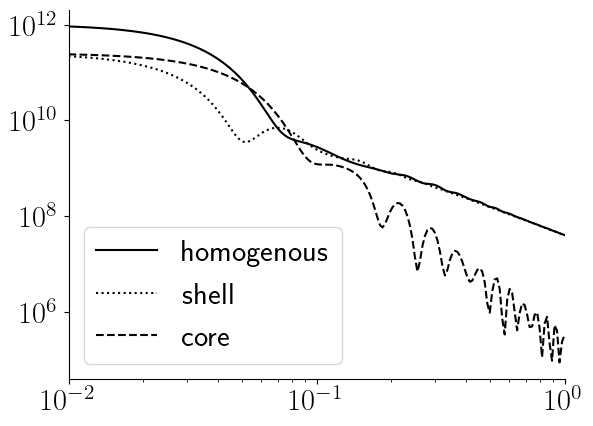

CPU times: user 469 ms, sys: 73.7 ms, total: 542 ms
Wall time: 1.07 s


In [20]:
%%time
model = load_model("./models/cylindrical_micelle.py")
q = np.logspace(-2, 0, 200)
kernel = model.make_kernel([q])
with plt.style.context(pyplot_style):
    fig, ax = plt.subplots()
    labels =['homogenous', 'shell', 'core']
    linestyles = ['solid','dotted','dashed' ]
    for i in range(3):
        rho_solv, rho_s, rho_c = get_contrasts(i+1)
        print('[%s] : '%labels[i], rho_solv, rho_s, rho_c)
        cyl_params = {'v_core' : Vc,    
                'v_corona' : Vs,
                'sld_solvent' : rho_solv,
                'sld_core' : rho_s,
                'sld_corona' : rho_c,
                'radius_core': R,
                'rg': Rg,
                'length_core': 100.0,
                'd_penetration':d,
                'n_aggreg' : N,
                }
        Iq = call_kernel(kernel, cyl_params)
        ax.loglog(q, Iq, label=labels[i], ls=linestyles[i], color='k')
        # ax.set_ylim([1e0, 1e6])
        ax.set_xlim([1e-2, 1e0])
    ax.legend()
    plt.show()

## Long-cylindrical micelle in sasmodels

Length : 200 Å 
Length : 400 Å 
Length : 1000 Å 
Length : 10000 Å 


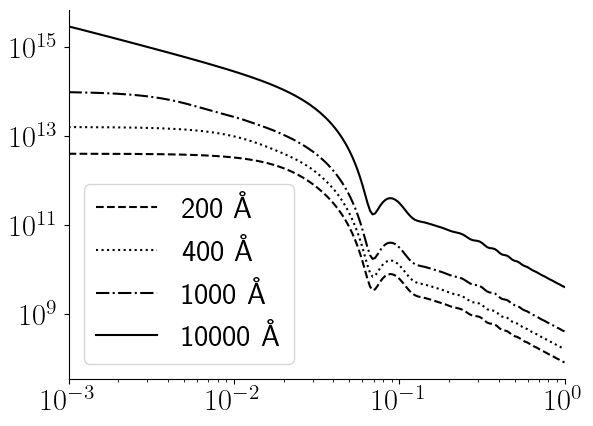

CPU times: user 235 ms, sys: 291 ms, total: 526 ms
Wall time: 5.3 s


In [21]:
%%time
with plt.style.context(pyplot_style):
    fig, ax = plt.subplots()
    linestyles = ['dashed','dotted','dashdot', 'solid']

    model = load_model("./models/longcylinder_micelle.py")
    q = np.logspace(-3, 0, 200)
    kernel = model.make_kernel([q])
    L = [200, 400, 1000, 10000]

    for i in range(4):
        print('Length : %d Å '%L[i])
        longcyl_params = {'v_core' : Vc,    
                'v_corona' : Vs,
                'sld_solvent' : 1.0,
                'sld_core' : 2.0,
                'sld_corona' : 2.0,
                'radius_core': R,
                'rg': Rg,
                'length_core': L[i],
                'd_penetration':d,
                'n_aggreg' : N,
                'scale': 1.0,
                'background': 0.0
                }
        q = np.logspace(np.log10(1e-3), np.log10(1), 200)
        Iq = call_kernel(kernel, longcyl_params)
        ax.loglog(q, Iq, label='%d Å'%L[i], ls=linestyles[i], color='k')
        # ax.set_ylim([1e0, 1e9])
        ax.set_xlim([1e-3, 1e0])
    ax.legend()
    plt.show()